In [1]:
from car_ped_2 import CarEnv
import numpy as np
from My_DDQN import DDQN
import random
import matplotlib.pyplot as plt

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
env=CarEnv()
observation = env.reset()
observation_space=len(observation) #we get the number of parameters in the state
action_space=10 #number of discrete velocities pedestrian can take
agent=DDQN(observation_space, action_space)
episodes=500

In [3]:
reward_list=[0]
print(agent.gamma)
for e in range(episodes):
    episode_reward=0
    state=env.reset()
    state = np.reshape(state, [1, observation_space])    
    while True:
        action=agent.act(state)       
        action_1=-1*env.C_acceleration_limit+action*(2*(env.C_acceleration_limit)/(action_space-1))
        state_next, reward, terminal = env.step(np.array([action_1]))
        episode_reward+=reward
        state_next = np.reshape(state_next, [1, observation_space])
        agent.add_memory(state, action, reward, state_next, terminal)
        if(reward==5000 or reward==-10000):            
            agent.add_bad_memory(state, action, reward, state_next, terminal)
        state = state_next
        if(len(agent.memory)>agent.minibatch_size):
            agent.replay()
        if terminal:
            print ("Episode: " + str(e) + ", exploration: " + str(agent.exploration_rate) + ", score: " + str(episode_reward)+" ,goal reward: "+str(reward))            
            agent.target_model_update()
            reward_list.append((reward_list[len(reward_list)-1]*e+episode_reward)/(e+1))
            break
    if agent.exploration_rate>agent.exploration_min:
        agent.exploration_rate*=agent.exploration_decay  

0.999
Episode: 0, exploration: 1, score: -13577.8 ,goal reward: -10000
Episode: 1, exploration: 0.995, score: -5515.0 ,goal reward: -1000
Episode: 2, exploration: 0.990025, score: 2389.3999999999996 ,goal reward: 5000
Episode: 3, exploration: 0.985074875, score: -12497.6 ,goal reward: -10000
Episode: 4, exploration: 0.9801495006250001, score: -5515.0 ,goal reward: -1000
Episode: 5, exploration: 0.9752487531218751, score: -5515.0 ,goal reward: -1000
Episode: 6, exploration: 0.9703725093562657, score: -5515.0 ,goal reward: -1000
Episode: 7, exploration: 0.9655206468094844, score: -11575.3 ,goal reward: -10000
Episode: 8, exploration: 0.960693043575437, score: -5515.0 ,goal reward: -1000
Episode: 9, exploration: 0.9558895783575597, score: -11702.0 ,goal reward: -10000
Episode: 10, exploration: 0.9511101304657719, score: -5515.0 ,goal reward: -1000
Episode: 11, exploration: 0.946354579813443, score: -12565.1 ,goal reward: -10000
Episode: 12, exploration: 0.9416228069143757, score: -14132.8

Episode: 100, exploration: 0.6057704364907278, score: -5515.0 ,goal reward: -1000
Episode: 101, exploration: 0.6027415843082742, score: -5515.0 ,goal reward: -1000
Episode: 102, exploration: 0.5997278763867329, score: -5515.0 ,goal reward: -1000
Episode: 103, exploration: 0.5967292370047992, score: -5515.0 ,goal reward: -1000
Episode: 104, exploration: 0.5937455908197752, score: -5515.0 ,goal reward: -1000
Episode: 105, exploration: 0.5907768628656763, score: -5515.0 ,goal reward: -1000
Episode: 106, exploration: 0.5878229785513479, score: -5515.0 ,goal reward: -1000
Episode: 107, exploration: 0.5848838636585911, score: -5515.0 ,goal reward: -1000
Episode: 108, exploration: 0.5819594443402982, score: -5515.0 ,goal reward: -1000
Episode: 109, exploration: 0.5790496471185967, score: -5515.0 ,goal reward: -1000
Episode: 110, exploration: 0.5761543988830038, score: -5515.0 ,goal reward: -1000
Episode: 111, exploration: 0.5732736268885887, score: -5515.0 ,goal reward: -1000
Episode: 112, ex

Episode: 200, exploration: 0.3669578217261671, score: -5515.0 ,goal reward: -1000
Episode: 201, exploration: 0.36512303261753626, score: -5515.0 ,goal reward: -1000
Episode: 202, exploration: 0.3632974174544486, score: -12279.1 ,goal reward: -10000
Episode: 203, exploration: 0.3614809303671764, score: -5515.0 ,goal reward: -1000
Episode: 204, exploration: 0.3596735257153405, score: -5515.0 ,goal reward: -1000
Episode: 205, exploration: 0.3578751580867638, score: -5515.0 ,goal reward: -1000
Episode: 206, exploration: 0.35608578229633, score: -5515.0 ,goal reward: -1000
Episode: 207, exploration: 0.3543053533848483, score: -5515.0 ,goal reward: -1000
Episode: 208, exploration: 0.35253382661792404, score: -5515.0 ,goal reward: -1000
Episode: 209, exploration: 0.3507711574848344, score: 3821.8999999999996 ,goal reward: 5000
Episode: 210, exploration: 0.34901730169741024, score: -5515.0 ,goal reward: -1000
Episode: 211, exploration: 0.3472722151889232, score: -5515.0 ,goal reward: -1000
Epi

Episode: 300, exploration: 0.22229219984074702, score: -5515.0 ,goal reward: -1000
Episode: 301, exploration: 0.2211807388415433, score: -5515.0 ,goal reward: -1000
Episode: 302, exploration: 0.22007483514733558, score: -5515.0 ,goal reward: -1000
Episode: 303, exploration: 0.2189744609715989, score: -5515.0 ,goal reward: -1000
Episode: 304, exploration: 0.2178795886667409, score: -5515.0 ,goal reward: -1000
Episode: 305, exploration: 0.2167901907234072, score: -5515.0 ,goal reward: -1000
Episode: 306, exploration: 0.21570623976979014, score: -5515.0 ,goal reward: -1000
Episode: 307, exploration: 0.21462770857094118, score: -5515.0 ,goal reward: -1000
Episode: 308, exploration: 0.21355457002808648, score: 3563.5 ,goal reward: 5000
Episode: 309, exploration: 0.21248679717794605, score: -5515.0 ,goal reward: -1000
Episode: 310, exploration: 0.21142436319205632, score: -5515.0 ,goal reward: -1000
Episode: 311, exploration: 0.21036724137609603, score: -5515.0 ,goal reward: -1000
Episode: 3

Episode: 400, exploration: 0.1346580429260134, score: -5515.0 ,goal reward: -1000
Episode: 401, exploration: 0.13398475271138335, score: -5515.0 ,goal reward: -1000
Episode: 402, exploration: 0.13331482894782642, score: -5515.0 ,goal reward: -1000
Episode: 403, exploration: 0.13264825480308728, score: -5515.0 ,goal reward: -1000
Episode: 404, exploration: 0.13198501352907185, score: -5515.0 ,goal reward: -1000
Episode: 405, exploration: 0.1313250884614265, score: -5515.0 ,goal reward: -1000
Episode: 406, exploration: 0.13066846301911936, score: -5515.0 ,goal reward: -1000
Episode: 407, exploration: 0.13001512070402377, score: -5515.0 ,goal reward: -1000
Episode: 408, exploration: 0.12936504510050365, score: -5515.0 ,goal reward: -1000
Episode: 409, exploration: 0.12871821987500112, score: -5515.0 ,goal reward: -1000
Episode: 410, exploration: 0.12807462877562611, score: -5515.0 ,goal reward: -1000
Episode: 411, exploration: 0.12743425563174798, score: -5515.0 ,goal reward: -1000
Episod

Episode: 499, exploration: 0.08198177029173696, score: -5515.0 ,goal reward: -1000


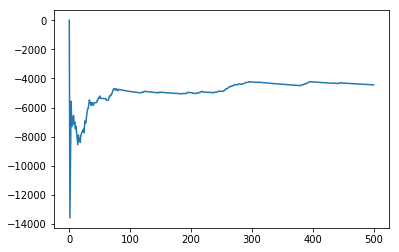

In [4]:
plt.figure(1)
plt.plot(reward_list)
plt.show()

In [5]:
state=env.reset()
state = np.reshape(state, [1, observation_space])
death_toll=0
safe_chicken=0
done_count=0
agent.exploration_rate=0
for t in range(5000): 
    action = agent.act(state)    
    action_1=-1*env.C_acceleration_limit+action*(2*(env.C_acceleration_limit)/(action_space-1))    
    observation, reward, done = env.step(np.array([action_1]))          
    if done:       
        done_count+=1
        if (reward==-10000):
            death_toll+=1                                              
        if (reward==5000):           
            safe_chicken+=1        
        env.reset()
    state = np.reshape(observation, [1, observation_space])
    
    
print('Death_toll '+str(death_toll))
print('Episodes', done_count)
print('Death_toll % '+str(death_toll*100/(done_count)))
print('Safe_chicken',safe_chicken)
print('Safe_toll % '+str(safe_chicken*100/(done_count)))

Death_toll 0
Episodes 16
Death_toll % 0.0
Safe_chicken 0
Safe_toll % 0.0


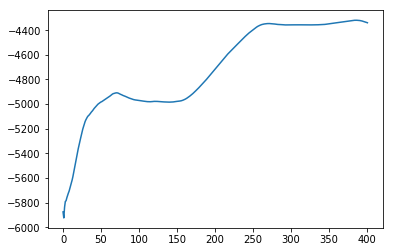

In [6]:
N = 100
cumsum, moving_aves = [0], []

for i, x in enumerate(reward_list, 1):
    cumsum.append(cumsum[i-1] + x)
    if i>=N:
        moving_ave = (cumsum[i] - cumsum[i-N])/N
        #can do stuff with moving_ave here
        moving_aves.append(moving_ave)

plt.figure(2)
plt.plot(moving_aves)
plt.show()

In [7]:
from keras.models import load_model
agent.model.save('ddqn_car_Learner_1.h5')